In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parte C (Plano de fase y estabilidad)

Considere el siguiente sistema lineal numérico que representa dos subpoblaciones que comparten recursos limitados:

$$
\begin{cases}
\frac{dx}{dt} = 0.02x - 0.01y \text{,} \\
\frac{dy}{dt} = 0.01x - 0.03y
\end{cases}
$$

### Análisis del modelo logístico (Representación del Problema como Ecuación Diferencial Ordinaria):

#### 1. Formulación del Problema de Sistema de Ecuaciones Lineales:

**Sistema Diferencial:**

$$
\begin{cases}
\frac{dx}{dt} = 0.02x - 0.01y \text{,} \\
\frac{dy}{dt} = 0.01x - 0.03y
\end{cases}
$$

**Forma Matricial:**

$$\mathbb{X}^′ = A\mathbb{X}$$

donde:

- $\mathbb{X}$ es el vector de estado de las poblaciones:
    
$$\mathbb{X} = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix}$$

- y $A$ es la matriz de los coeficientes (o matriz del sistema):

$$A = \begin{pmatrix} 0.02 & -0.01 \\ 0.01 & -0.03 \end{pmatrix}$$

#### 2. Identificación y Análisis de Parámetros

##### 2.1 Parámetros de Crecimiento Intrínsico (Diagonal Principal)

**Forma Matricial:** $A = {a_{ij}}_{2x2}$

Asumamos además que la unidad de tiempo empleada es de año y que $x(t)$ y $y(t)$ son de unidades de población (UP).

| Parámetro | Valor | Unidades | Interpretación | Signo Biológico |
| :--- | :--- | :--- | :--- | :--- |
| **$a_{11}$** | **$0.02$** | $\text{año}^{-1}$ | Tasa neta de crecimiento de **$x$** en ausencia de **$y$**. | Positivo (Crecimiento) |
| **$a_{22}$** | **$-0.03$** | $\text{año}^{-1}$ | Tasa neta de crecimiento de **$y$** en ausencia de **$x$**. | Negativo (Decrecimiento/Mortalidad) |

##### 2.2. Parámetros de Interacción Interespecífica (Diagonal Secundaria)

| Parámetro | Valor | Unidades | Interpretación | Signo Biológico |
| :--- | :--- | :--- | :--- | :--- |
| **$a_{12}$** | **$-0.01$** | $\text{UP}^{-1} \cdot \text{año}^{-1}$ | Efecto de **$y$** sobre la tasa de crecimiento de **$x$**. | Negativo ($\mathbf{y \to x}$ Competencia/Depredación) |
| **$a_{21}$** | **$0.01$** | $\text{UP}^{-1} \cdot \text{año}^{-1}$ | Efecto de **$x$** sobre la tasa de crecimiento de **$y$**. | Positivo ($\mathbf{x \to y}$ Cooperación/Facilitación) |

#### 3. Condiciones Iniciales y su Significado

##### 3.1 Valor Inicial
- El problema propuesto no tiene una condicion inicial definida pero suele ser un vector $\mathbb{X_0} = \begin{pmatrix} x_0 \\ y_0 \end{pmatrix}$ para un $t_0$ valor de tiempo inicial.

##### 3.2 Condiciones de Contorno Implícitas
- Positividad Poblacional (Restricción Fundamental): $x(t) \geq 0 \quad \text{y} \quad y(t) \geq 0 \quad \text{para todo } t \geq 0$ 

#### 4. Contexto Físico y Biológico

Este modelo describe la dinámica de dos subpoblaciones ($x$ e $y$) que interactúan en un entorno donde la **limitación de recursos no está modelada** (naturaleza lineal del sistema), lo que sugiere que es válido principalmente a **corto plazo** o en ambientes con **recursos abundantes**.

##### 4.1. Fundamentos Ecológicos (Hipótesis del Modelo Lineal)

* **Población Abierta / Crecimiento Ilimitado:** La ausencia de términos cuadráticos (como $-bx^2$) implica la **falta de competencia intraespecífica**. El análisis de valores propios revela que las poblaciones **crecerán exponencialmente** sin cota superior (si las condiciones iniciales no son cero).
* **Ambiente Estático:** Los coeficientes (parámetros) son constantes en el tiempo, asumiendo un ambiente **homogéneo** sin variaciones significativas que alteren las tasas de natalidad o mortalidad.
* **Interacción Densa-Independiente:** La intensidad de la interacción interspecífica ($\pm 0.01$) no cambia con el tamaño de las poblaciones.

##### 4.2. Mecanismos Biológicos (Interacción Interespecífica Asimétrica)

El modelo presenta una interacción **asimétrica y mixta** basada en los signos de los coeficientes fuera de la diagonal:

| Relación | Coeficiente | Signo | Descripción Biológica | Tipo de Interacción |
| :--- | :--- | :--- | :--- | :--- |
| **$y \to x$** | $a_{12} = -0.01$ | Negativo | La subpoblación $y$ **inhibe** el crecimiento de $x$. | Competencia / Amensalismo |
| **$x \to y$** | $a_{21} = +0.01$ | Positivo | La subpoblación $x$ **estimula** el crecimiento de $y$. | Cooperación / Facilitación |

##### Detalle de las Ecuaciones:

* **Ecuación de $x$ ($\frac{dx}{dt}$):** $x$ tiene un fuerte potencial de crecimiento inicial ($+0.02x$), pero es ligeramente afectado negativamente por $y$.
* **Ecuación de $y$ ($\frac{dy}{dt}$):** $y$ tiene una **tasa de crecimiento intrínseca negativa** ($-0.03y$, es decir, tiende a extinguirse por sí misma) y su supervivencia depende de la **facilitación** de $x$ ($+0.01x$) para mantener su población.

##### 4.3. Conclusión de la Dinámica

Este sistema lineal es un ejemplo de interacción donde:
1.  La especie $x$ tiene la **ventaja competitiva intrínseca** y el crecimiento base.
2.  La especie $y$ es **intrínsecamente débil** y depende de una interacción positiva con $x$ para subsistir, a pesar de que $y$ perjudica ligeramente a $x$.

El sistema es **inestable** y, por lo tanto, las poblaciones $x$ e $y$ (en la mayoría de los casos) **crecerán exponencialmente sin límite** en el tiempo, a menos que $\frac{dx}{dt}$ y $\frac{dy}{dt}$ se restrinjan.

#### Solución del Sistema:

$$\begin{cases} \frac{dx}{dt} = 0.02x - 0.01y \\ \frac{dy}{dt} = 0.01x - 0.03y \end{cases}$$

La solución general $\mathbb{X}(t)$ del sistema $\mathbb{X}^′ = A\mathbb{X}$ viene dada por la combinación lineal de las soluciones asociadas a los valores propios y vectores propios de la matriz $A$ (para valores propios reales distintos):

$$\mathbb{X}(t) = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2$$

Donde $\lambda_i$ son los valores propios y $\mathbf{v}_i$ son los vectores propios asociados, y $c_1, c_2$ son constantes determinadas por las condiciones iniciales.

La matriz de coeficientes es:
$$A = \begin{pmatrix} 0.02 & -0.01 \\ 0.01 & -0.03 \end{pmatrix}$$

Donde su polinomio característico $\det(A - \lambda I) = 0$ es:
$$\lambda^2 + 0.01\lambda - 0.0005 = 0$$

Resolviendo la ecuación cuadrática, obtenemos los siguientes valores propios (reales distintos):

1.  $\lambda_1 = \frac{-0.01 + \sqrt{0.0021}}{2} \approx \mathbf{0.01791}$ (Valor propio positivo, asociado al crecimiento)
2.  $\lambda_2 = \frac{-0.01 - \sqrt{0.0021}}{2} \approx \mathbf{-0.02791}$ (Valor propio negativo, asociado a la decadencia)

Ahora calculamos el vector propio $\mathbf{v}$ asociado a cada valor propio, resolviendo $(A - \lambda I)\mathbf{v} = \mathbf{0}$.

A. Vector Propio $\mathbf{v}_1$ para $\lambda_1 \approx 0.01791$

Sustituimos $\lambda_1$ en $(A - \lambda_1 I)\mathbf{v}_1 = \mathbf{0}$:

$$\begin{pmatrix} 0.02 - 0.01791 & -0.01 \\ 0.01 & -0.03 - 0.01791 \end{pmatrix} \begin{pmatrix} v_{1x} \\ v_{1y} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
$$\begin{pmatrix} 0.00209 & -0.01 \\ 0.01 & -0.04791 \end{pmatrix} \begin{pmatrix} v_{1x} \\ v_{1y} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

Usando la primera fila (o la segunda, son dependientes):
$$0.00209 v_{1x} - 0.01 v_{1y} = 0$$
$$v_{1y} = \frac{0.00209}{0.01} v_{1x} \approx 0.209 v_{1x}$$

Elegimos $v_{1x}=1$:
$$\mathbf{v}_1 \approx \begin{pmatrix} 1 \\ 0.209 \end{pmatrix}$$

B. Vector Propio $\mathbf{v}_2$ para $\lambda_2 \approx -0.02791$

Sustituimos $\lambda_2$ en $(A - \lambda_2 I)\mathbf{v}_2 = \mathbf{0}$:

$$\begin{pmatrix} 0.02 - (-0.02791) & -0.01 \\ 0.01 & -0.03 - (-0.02791) \end{pmatrix} \begin{pmatrix} v_{2x} \\ v_{2y} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$
$$\begin{pmatrix} 0.04791 & -0.01 \\ 0.01 & -0.00209 \end{pmatrix} \begin{pmatrix} v_{2x} \\ v_{2y} \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$$

Usando la primera fila:
$$0.04791 v_{2x} - 0.01 v_{2y} = 0$$
$$v_{2y} = \frac{0.04791}{0.01} v_{2x} \approx 4.791 v_{2x}$$

Elegimos $v_{2x}=1$:
$$\mathbf{v}_2 \approx \begin{pmatrix} 1 \\ 4.791 \end{pmatrix}$$

##### Solución General:

La solución general es la combinación lineal de las soluciones encontradas:

$$\mathbb{X}^′ = c_1 e^{\lambda_1 t} \mathbf{v}_1 + c_2 e^{\lambda_2 t} \mathbf{v}_2$$

Sustituyendo los valores:

$$\mathbb{X}^′ \approx c_1 e^{0.01791 t} \begin{pmatrix} 1 \\ 0.209 \end{pmatrix} + c_2 e^{-0.02791 t} \begin{pmatrix} 1 \\ 4.791 \end{pmatrix}$$

Esto se puede escribir como dos ecuaciones escalares separadas:

$$\begin{aligned} x(t) &\approx c_1 e^{0.01791 t} + c_2 e^{-0.02791 t} \\ y(t) &\approx 0.209 c_1 e^{0.01791 t} + 4.791 c_2 e^{-0.02791 t} \end{aligned}$$

Donde $c_1$ y $c_2$ son constantes arbitrarias que se determinarán usando las condiciones iniciales $(x_0, y_0)$.

##### Interpretación a Largo Plazo ($t \to \infty$)

Dado que $\lambda_1 > 0$ y $\lambda_2 < 0$, si $c_1 \neq 0$:
* El término $e^{-0.02791 t}$ tiende a **cero**.
* El término $e^{0.01791 t}$ tiende a **infinito**.

Esto confirma el análisis previo: las poblaciones crecen sin límite, y a largo plazo, la dinámica es dominada por el vector propio $\mathbf{v}_1$. La proporción de las poblaciones se acercará a la proporción de $\mathbf{v}_1$:
$$\frac{y(t)}{x(t)} \to \frac{0.209 c_1 e^{\lambda_1 t}}{c_1 e^{\lambda_1 t}} \approx \mathbf{0.209}$$

A largo plazo, la población $y$ será aproximadamente el 20.9% de la población $x$, y ambas crecerán exponencialmente.

### Preguntas clave:

1. Calcule los puntos críticos y clasifíquelos (tipo y estabilidad).

Los puntos críticos ($v^∗$) son los puntos donde la tasa de cambio de ambas poblaciones es cero, es decir:

$$\begin{aligned}
\frac{dx}{dt} = 0 \\
\frac{dy}{dt} = 0
\end{aligned}$$

Esto nos lleva a resolver el siguiente sistema algebraico lineal:

$$\begin{aligned}
0.02x−0.01y = 0 \\
0.01x−0.03y = 0
\end{aligned}$$

Podemos reescribir la primera ecuación:

$$0.02x=0.01y \implies y=2x$$

Sustituimos esta relación en la segunda ecuación:

$$\begin{aligned}
0.01x−0.03(2x)=0 \\
0.01x−0.06x=0 \\
−0.05x=0 \implies x=0
\end{aligned}$$

Si $x=0$, volvemos a $y=2x$:

$$y=2(0)=0$$

De donde el único punto de equilibrio (o punto crítico) del sistema es el origen:

$$v^∗=(x^∗,y^∗)=(0,0)$$

La clasificación del punto crítico $(0,0)$ se determina analizando el signo y la naturaleza de los valores propios $(λ)$ de la matriz $A$.

Recuperamos los valores propios calculados previamente:

1.  $\lambda_1 = \frac{-0.01 + \sqrt{0.0021}}{2} \approx \mathbf{0.01791}$ 
2.  $\lambda_2 = \frac{-0.01 - \sqrt{0.0021}}{2} \approx \mathbf{-0.02791}$

Como los valores propios son reales y de signo opuesto ($λ_1​>0$ y $λ_2​<0$), el punto crítico $(0,0)$ se clasifica como Punto de Silla.

| Característica | Detalle |
| :--- | :--- |
| Tipo de Punto Crítico | Punto de Silla (o Punto de Ensilladura) |
| Estabilidad | Inestable |

Inestable: El punto de silla es inestable. Esto significa que cualquier perturbación (es decir, cualquier condición inicial $v_0$​ donde $x_0​ \neq 0$ o $y_0​ \neq 0$) alejará la trayectoria del origen, excepto en el caso especial donde $v_0$​ cae exactamente sobre el eje estable ($y \approx 4.791x$).

Conclusión Biológica: La única forma de que ambas poblaciones se extingan es si comienzan en el origen o en una combinación muy específica de $x_0$​ y $y_0​$ dada por el vector propio estable. Para cualquier otra condición inicial biológicamente relevante, ambas poblaciones crecen exponencialmente a largo plazo, con la proporción definida por el vector propio inestable $v_1$​.

1. Verifíquelo construyendo el plano de fase y explique brevemente cómo interpretar las trayectorias en términos de equilibrio poblacional y capacidad máxima compartida.

--- Resultados del Análisis de Estabilidad ---
Valor Propio 1 (lambda1): 0.01791
Vector Propio 1 (v1): [0.97890631 0.20430964]
Valor Propio 2 (lambda2): -0.02791
Vector Propio 2 (v2): [0.20430964 0.97890631]

Punto Crítico (0, 0) Clasificación: Punto de Ensilladura


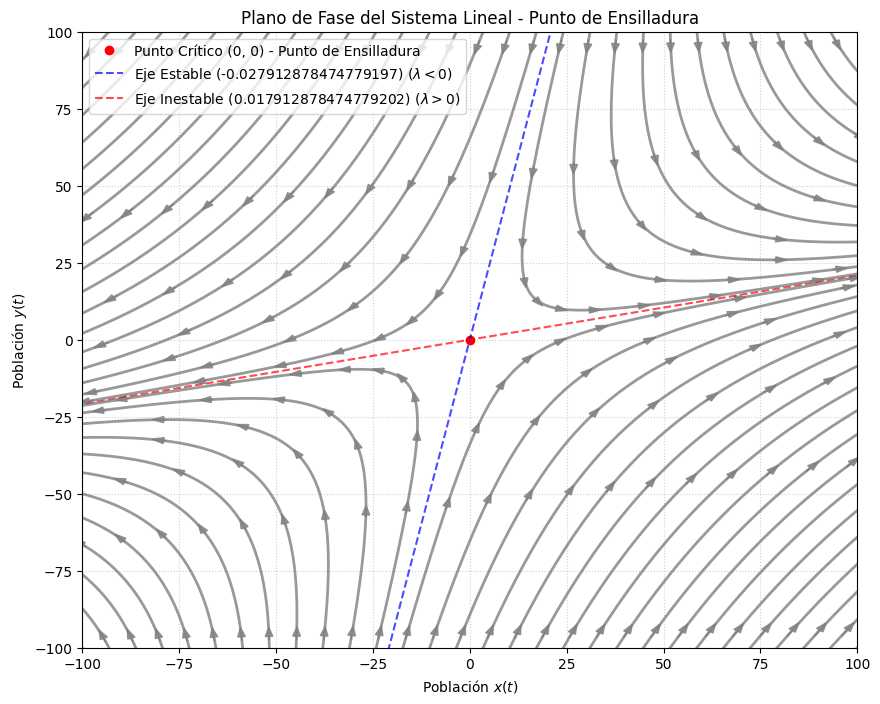

In [15]:
A = np.array([[0.02, -0.01],
              [0.01, -0.03]])

def F(t, v):
    x, y = v
    dxdt = A[0][0]*x + A[0][1]*y 
    dydt = A[1][0]*x + A[1][1]*y 
    return [dxdt, dydt] 

space_range = 100

eigen_values, eigen_vectors = np.linalg.eig(A)

lambda1, lambda2 = eigen_values[0], eigen_values[1]
v1, v2 = eigen_vectors[:, 0], eigen_vectors[:, 1]

# Use the real part for stability classification
r1 = np.real(lambda1)
r2 = np.real(lambda2)

# Initialize lists to store axes for plotting
stable_axes = []
unstable_axes = []
stable_lambda = []
unstable_lambda = []
center_type = None

# --- Classification Logic ---

if np.imag(lambda1) != 0:
    # Case: Spiral or Center (Complex Eigenvalues)
    if r1 > 0:
        center_type = 'Espiral Inestable'
    elif r1 < 0:
        center_type = 'Espiral Estable'
    else: # r1 == 0
        center_type = 'Centro'
    
elif r1 * r2 < 0:
    # Case 1: Saddle Point (Opposite signs)
    center_type = 'Punto de Ensilladura'
    
    if r1 < 0:
        # lambda1 is stable, lambda2 is unstable
        stable_axes.append(v1)
        unstable_axes.append(v2)
        stable_lambda.append(lambda1)
        unstable_lambda.append(lambda2)
    else:
        # lambda2 is stable, lambda1 is unstable
        stable_axes.append(v2)
        unstable_axes.append(v1)
        stable_lambda.append(lambda2)
        unstable_lambda.append(lambda1)

elif r1 > 0 and r2 > 0:
    # Case 2: Unstable Node (Both positive)
    center_type = 'Nodo Inestable'
    unstable_axes.extend([v1, v2])
    unstable_lambda.extend([lambda1, lambda2])

elif r1 < 0 and r2 < 0:
    # Case 3: Stable Node (Both negative)
    center_type = 'Nodo Estable'
    stable_axes.extend([v1, v2])
    stable_lambda.extend([lambda1, lambda2])

else:
    center_type = 'Caso Degenerado'

print("--- Resultados del Análisis de Estabilidad ---")
print(f"Valor Propio 1 (lambda1): {lambda1:.5f}")
print(f"Vector Propio 1 (v1): {v1}")
print(f"Valor Propio 2 (lambda2): {lambda2:.5f}")
print(f"Vector Propio 2 (v2): {v2}")
print(f"\nPunto Crítico (0, 0) Clasificación: {center_type}")

# --- Phase Plane Construction ---

# Range for the phase plane
x_range = np.linspace(-space_range, space_range, space_range//2)
y_range = np.linspace(-space_range, space_range, space_range//2)
X, Y = np.meshgrid(x_range, y_range)

plt.figure(figsize=(10, 8))

# Draw the Equilibrium Point (Origin)
plt.plot(0, 0, 'ro', label=f'Punto Crítico (0, 0) - {center_type}')

# Draw the Eigenspaces (Straight-line trajectories)
x_line = np.linspace(-2*space_range, 2*space_range, 5*space_range)

# Plot Stable Axes
for i, v_s in enumerate(stable_axes):
    m_stable = v_s[1] / v_s[0]
    plt.plot(x_line, m_stable * x_line, 'b--', 
             label=f'Eje Estable ({stable_lambda[i]}) ' + r'($\lambda < 0$)' if i == 0 else "", alpha=0.7)

# Plot Unstable Axes
for i, v_u in enumerate(unstable_axes):
    m_unstable = v_u[1] / v_u[0]
    plt.plot(x_line, m_unstable * x_line, 'r--', 
             label=f'Eje Inestable ({unstable_lambda[i]}) ' + r'($\lambda > 0$)' if i == 0 else "", alpha=0.7)

t_integration_span = [-5*space_range, 5*space_range]
num_integration_points = 10*space_range 

x_values = np.linspace(-space_range, space_range, 30)
upper_list = [[x, space_range] for x in x_values]
lower_list = [[x, -space_range] for x in x_values]

initial_conditions = upper_list + lower_list

# Color for all sample trajectories
trajectory_color = 'gray' 
arrow_color = 'gray'
arrow_spacing = 0.05

for i, initial in enumerate(initial_conditions):
    sol = solve_ivp(F, t_integration_span, initial, dense_output=True, 
                    t_eval=np.linspace(t_integration_span[0], t_integration_span[1], num_integration_points))
    
    plt.plot(sol.y[0], sol.y[1], color=trajectory_color, linewidth=2, alpha=0.8)

    for j in range(1, len(sol.y[0]) - 1, int(1/arrow_spacing)):
        x_arrow = sol.y[0, j]
        y_arrow = sol.y[1, j]
        
        dx_dt, dy_dt = F(sol.t[j], [x_arrow, y_arrow])
        
        plt.arrow(x_arrow, y_arrow, dx_dt * 0.5, dy_dt * 0.5, 
                  head_width=2, head_length=3, fc=arrow_color, ec=arrow_color, alpha=0.8)

plt.xlim(-space_range, space_range)
plt.ylim(-space_range, space_range)
plt.xlabel('Población $x(t)$')
plt.ylabel('Población $y(t)$')
plt.title(f'Plano de Fase del Sistema Lineal - {center_type}')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()

#### Equilibrio Poblacional (Punto de Silla)

El punto crítico es $(0,0)$, clasificado como Punto de Silla (Saddle Point), lo cual es confirmado por la gráfica:

- Inestabilidad General: El punto de silla es un equilibrio inestable. Las flechas del campo vectorial apuntan hacia el origen solo en la dirección del Eje Estable (línea azul punteada) y se alejan del origen en la dirección del Eje Inestable (línea roja punteada).

- Destino a Largo Plazo ($t \to \infty$): Casi todas las trayectorias de la población (curvas) se acercan brevemente al origen antes de ser repelidas a lo largo del Eje Inestable, lo que indica que $x(t)$ y $y(t)$ crecen exponencialmente hacia el infinito (divergen).

- Extinción (Caso Especial): La única excepción ocurre si la condición inicial $(x_0​,y_0​)$ cae exactamente sobre el Eje Estable $(λ_2​\approx −0.02791)$. Solo en ese caso, ambas poblaciones $x(t)$ y $y(t)$ convergerían a $(0,0)$, es decir, se extinguirían.

#### Capacidad Máxima Compartida (Cota)

- Ausencia de Cota Positiva: El hecho de que la mayoría de las trayectorias se alejen del origen hacia el infinito confirma que el sistema no tiene una capacidad máxima compartida (cota superior) positiva y finita.

- Dominio del Crecimiento: A medida que $t \to \infty$, las trayectorias se vuelven paralelas al Eje Inestable ($v_1 \approx (1,0.209)$). Esto significa que la dinámica de crecimiento de la población será dominada por el vector propio de crecimiento positivo, y la proporción de las poblaciones se estabilizará en $xy \approx 0.209$ (es decir, y será aproximadamente el $20.9%$ de $x$).

En resumen, el plano de fase verifica que el único equilibrio biológico es la extinción, y es inestable, prediciendo un crecimiento ilimitado para casi todas las condiciones iniciales.

### Planteamiento del Problema:

### Verificar planteamiento del problema
Para verificar si el problema de valor inicial está **bien planteado** en el sentido de Hadamard, analizamos tres condiciones fundamentales:

1.  **Existencia:** Existe al menos una solución en el intervalo de tiempo de interés.
2.  **Unicidad:** La solución es única para cada condición inicial dada.
3.  **Dependencia Continua:** La solución depende continuamente de las condiciones iniciales.

### 1. Formulación Matricial del Sistema

Reescribimos en su forma vectorial $\mathbf{x}' = A\mathbf{x}$, donde el vector de estado y la matriz de coeficientes son:

$$
\mathbf{x}(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix}, \quad A = \begin{pmatrix} 0.02 & -0.01 \\ 0.01 & -0.03 \end{pmatrix}
$$

Definimos la función del campo vectorial $F: \mathbb{R}^2 \to \mathbb{R}^2$ tal que $F(\mathbf{x}) = A\mathbf{x}$.

#### 2. Demostración de Existencia y Unicidad

Utilizamos el **Teorema de Picard-Lindelöf** (Teorema de Existencia y Unicidad), el cual garantiza solución única si la función $F(\mathbf{x})$ es continua y localmente Lipschitziana respecto a $\mathbf{x}$.

**A. Continuidad**
La función $F(\mathbf{x}) = A\mathbf{x}$ es una transformación lineal. Dado que toda transformación lineal en un espacio vectorial de dimensión finita es de clase $C^\infty$ (infinitamente diferenciable), $F$ es continua en todo el dominio $\mathbb{R}^2$.

**B. Condición de Lipschitz**
Una función es Lipschitziana si existe una constante $L > 0$ tal que para todo $\mathbf{x}_1, \mathbf{x}_2$ en el dominio:

$$
\| F(\mathbf{x}_1) - F(\mathbf{x}_2) \| \leq L \| \mathbf{x}_1 - \mathbf{x}_2 \|
$$

Sustituyendo nuestro sistema:

$$
\| A\mathbf{x}_1 - A\mathbf{x}_2 \| = \| A(\mathbf{x}_1 - \mathbf{x}_2) \|
$$

Por propiedades de la norma matricial, sabemos que $\| A\mathbf{v} \| \leq \| A \| \| \mathbf{v} \|$. Por lo tanto:

$$
\| A(\mathbf{x}_1 - \mathbf{x}_2) \| \leq \| A \| \| \mathbf{x}_1 - \mathbf{x}_2 \|
$$

La constante de Lipschitz $L$ corresponde a la norma de la matriz A. Dado que A contiene coeficientes constantes finitos, $\| A \|$ es finita. Al ser $F(\mathbf{x})$ globalmente Lipschitziana, el teorema garantiza la existencia y unicidad global de la solución para cualquier $\mathbf{x}_0 \in \mathbb{R}^2$ y para todo $t \in \mathbb{R}$.

#### 3. Estabilidad y Dependencia Continua

Debemos demostrar que pequeñas perturbaciones en los datos iniciales no provocan divergencias abruptas en la solución. Sean $\mathbf{u}(t)$ y $\mathbf{v}(t)$ dos soluciones generadas por las condiciones iniciales $\mathbf{u}_0$ y $\mathbf{v}_0$ respectivamente.

Definimos el error $\mathbf{e}(t) = \mathbf{u}(t) - \mathbf{v}(t)$. Su evolución temporal está dada por:

$$
\frac{d}{dt}\mathbf{e}(t) = A\mathbf{u}(t) - A\mathbf{v}(t) = A(\mathbf{u}(t) - \mathbf{v}(t)) = A\mathbf{e}(t)
$$

Tomando la norma y aplicando la desigualdad triangular:

$$
\frac{d}{dt} \| \mathbf{e}(t) \| \leq \| A\mathbf{e}(t) \| \leq \| A \| \| \mathbf{e}(t) \|
$$

Siendo $L = \| A \|$, obtenemos la desigualdad diferencial $\frac{d}{dt} \| \mathbf{e}(t) \| \leq L \| \mathbf{e}(t) \|$. Aplicando el **Lema de Gronwall**:

$$
\| \mathbf{e}(t) \| \leq \| \mathbf{e}(0) \| e^{L|t|}
$$

$$
\| \mathbf{u}(t) - \mathbf{v}(t) \| \leq \| \mathbf{u}_0 - \mathbf{v}_0 \| e^{L|t|}
$$

Esta desigualdad prueba la dependencia continua: para cualquier tiempo finito $T$ y cualquier tolerancia $\epsilon > 0$, existe un $\delta = \epsilon e^{-LT}$ tal que si la distancia inicial $\| \mathbf{u}_0 - \mathbf{v}_0 \| < \delta$, entonces la distancia entre las trayectorias se mantiene acotada por $\epsilon$.

#### Conclusión

El problema planteado cumple satisfactoriamente con las tres condiciones de Hadamard:
1.  Existe solución (continuidad de $A$).
2.  La solución es única (condición de Lipschitz).
3.  La solución depende continuamente de las condiciones iniciales (Lema de Gronwall).

Por lo tanto está **bien planteado**.